
# Average Bubble

In [1]:
from bubble_tools import *
from experiment import *


/home/dpirvu/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [2]:
kUV = max(klist[klist>0.]); print(kUV)
kIR = min(klist[klist>0.]); print(kIR)

sigmasqreno = np.log((kUV+np.sqrt(kUV**2.+m2eff))/(kIR+np.sqrt(kIR**2.+m2eff)))/2./np.pi; print(sigmasqreno)

ddddV = 4.*nu*(1.-4.*(lamb**2.)); print(ddddV)

m2reno = m2eff + 0.5*sigmasqreno*ddddV; print(m2reno)

print(np.sqrt(m2reno), np.sqrt(m2eff))

1.0133280031112024
0.0039738353063184404
0.47295599580359055
-0.064
-0.005134591865714898
0.07165606649624928 0.1


In [4]:
get_vels = False
get_avBubble = False


In [5]:
minSim = 100
maxSim = 150

for tmp, temp in enumerate(Tlist):
    if tmp==0: continue

    ph0      = phi0List[tmp]
    sigmafld = fluct_stdev(m2eff, ph0, temp)
    print('Temperature, phi0:', temp, ph0, sigmafld)

    win         = 150
    plots       = True
    critSize    = 30
    threshSize  = phieq + 3.*sigmafld
    print('Average bubble params:', win, critSize, threshSize)

    if get_vels:
        all_vels = []
        for sim in range(minSim, maxSim):
            loc_rest_bub = bubble_at_rest(nLat, lamb, ph0, temp, sim)+'.npy'
            if os.path.exists(loc_rest_bub):
                sim, real, totalvCOM, finalv = np.load(loc_rest_bub)
                if np.isnan(totalvCOM):
                    print('Remove', sim)
                    os.remove(loc_rest_bub)
                else:
                    all_vels.append(totalvCOM)

        print('Total bubbles included:', len(all_vels))
        np.save(velocities_bubbles_file(nLat, lamb, ph0, temp), np.asarray(all_vels))
        print('Velocities saved.')

    if get_avBubble:
        all_data1, all_data2 = [], []

        for sim in range(minSim, maxSim):      
            loc_rest_bub = bubble_at_rest(nLat, lamb, ph0, temp, sim)+'.npy'
            if os.path.exists(loc_rest_bub):
                sim, real, totalvCOM, finalv = np.load(loc_rest_bub)
                all_data1.append(np.asarray([real, totalvCOM, sim]))

        print('Total bubbles included:', len(all_data1), len(all_data2))
        all_data1 = np.asarray(all_data1)
        all_data2 = np.asarray(all_data2)

        typex = 2 # this is a must
        stacks  = stack_bubbles(all_data1, plots, win, phieq, threshSize, critSize, typex)
        stacks  = average_stacks(stacks, plots, normal)
        avstack = average_bubble_stacks(stacks)
    #    np.save(average_bubble_file(nLat, lamb, ph0, temp), avstack)
    #    print('Average bubble saved.')


Temperature, phi0: 0.11 1.7951958020513104 0.25986275091497074
Average bubble params: 150 30 3.9211809063347056
Temperature, phi0: 0.12 1.7951958020513104 0.2804597482039711
Average bubble params: 150 30 3.9829718982017064
Temperature, phi0: 0.08 1.7951958020513104 0.1916131500067567
Average bubble params: 150 30 3.716432103610063


In [5]:
bubbleList = []
for tmp, temp in enumerate(Tlist[:-1]):
    ph0      = phi0List[tmp]
    print('Temperature, phi0:', temp, ph0)
    bubbleList.append(np.load(average_bubble_file(nLat, lamb, ph0, temp)+'.npy'))


Temperature, phi0: 0.1 1.7951958020513104
Temperature, phi0: 0.11 1.7951958020513104
Temperature, phi0: 0.12 1.7951958020513104


No handles with labels found to put in legend.
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
/home/dpirvu/.local/lib/python3.7/site-packages/mpl_toolkits/axes_grid1/axes_grid.py:51: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:70: MatplotlibDepre

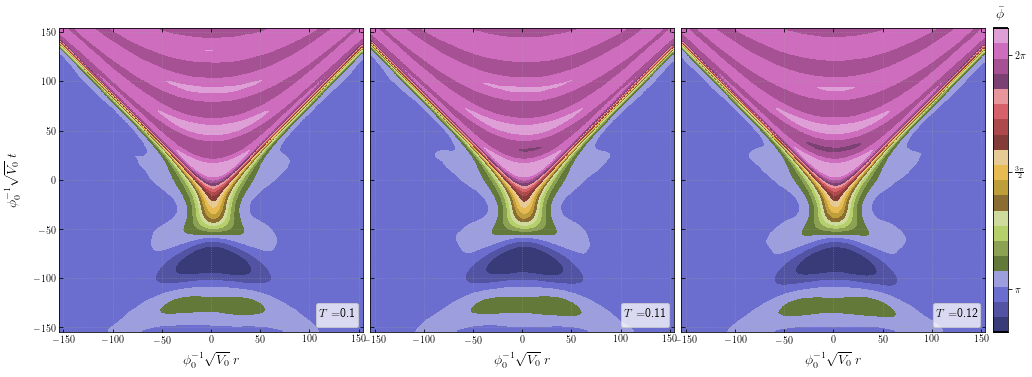

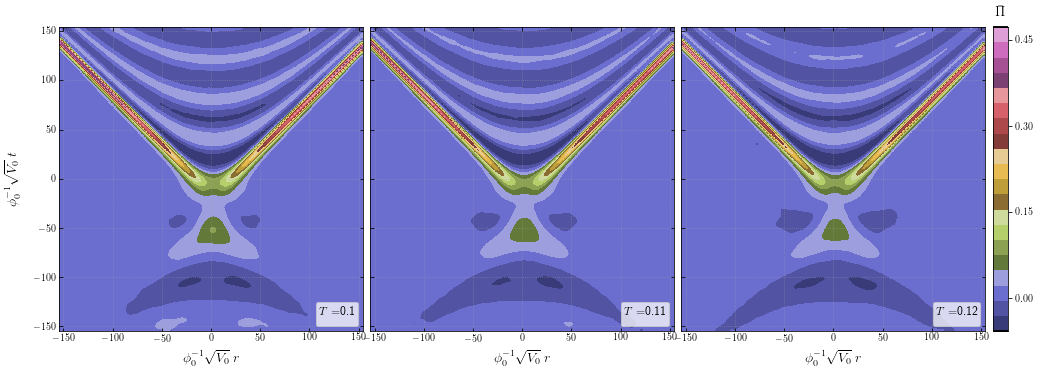

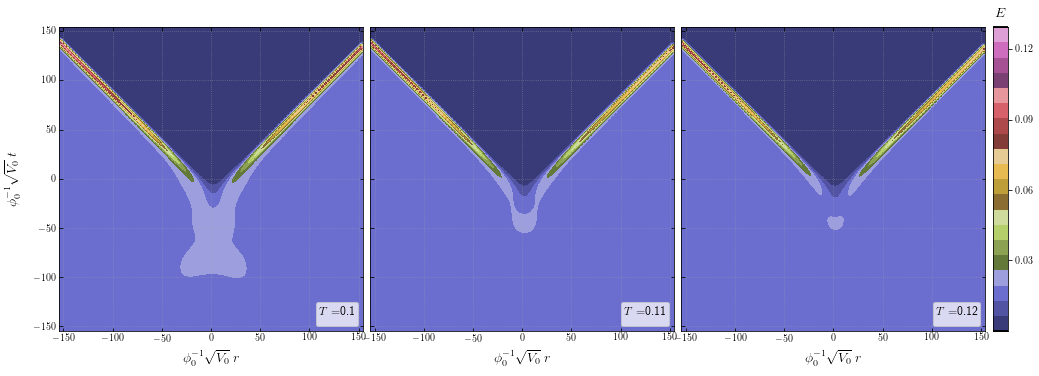

In [8]:
from mpl_toolkits.axes_grid1 import ImageGrid

win = 50
tp = 0 # 0 for average, 1 for error

critSize   = 15
sigmafld = fluct_stdev(m2eff, ph0, temp)
threshSize = right_Vmax.x + 2.*sigmafld

valmin, valmax = phieq, phieq


fig = plt.figure(figsize = (17, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, len(bubbleList)), share_all=True, axes_pad=0.1, cbar_location="right", cbar_mode="single")
im = [[]]*len(bubbleList)
for ii, average_bubble in enumerate(bubbleList):
    temp = Tlist[ii]

    nT, nN = np.shape(average_bubble[0,0])
    tcen, xcen  = find_nucleation_center2(average_bubble[0,0], phieq, threshSize, critSize)

    tl, tr      = max(0, tcen-win), min(nT-1, tcen+win)
    xl, xr      = max(0, xcen-win), min(nN-1, xcen+win)
    bubble2plot = average_bubble[tp,0][tl:tr,xl:xr]
    bubble2measure = average_bubble[0,0][tl:tr,xl:xr]
    nT, nN = np.shape(bubble2measure)
    tcen, xcen = find_nucleation_center2(bubble2measure, phieq, threshSize, critSize)
    ext  = np.asarray([(-xcen), (nN-xcen), (-tcen), (nT-tcen)])*dx

    if np.amin(bubble2plot) < valmin: valmin = np.amin(bubble2plot)
    if np.amax(bubble2plot) > valmax: valmax, maxable = np.amax(bubble2plot), ii

    grid[ii].legend(title=r'$T=$'+str(temp), loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    im[ii] = grid[ii].imshow(bubble2plot, interpolation='gaussian', extent=ext, origin='lower', cmap='tab20b')
    cbar = grid[ii].cax.colorbar(im[maxable], ticks=matplotlib.ticker.MultipleLocator(np.pi/2),\
                                                format=matplotlib.ticker.FuncFormatter(multiple_formatter()))
    grid[ii].cax.toggle_label(True)
    grid[ii].cax.set_title(r'$\bar{\phi}$')
    [im[ii].set_clim(vmin=valmin, vmax=valmax) for i in range(len(grid))]
    [grid[ii].tick_params(direction='in', which='both', top=True, right=True) for ii in range(len(grid))]
    [grid[ii].set(xlabel=r'$\phi_0^{-1} \sqrt{V_0} \; r$') for ii in range(len(grid))]
    grid[0].set(ylabel=r'$\phi_0^{-1} \sqrt{V_0} \; t$')
    grid[ii].grid(ls=':', color='darkgray', alpha=0.5)
plt.savefig('./data/average_thermal_bubble_comparison.pdf')

valmin, valmax = 0., 0.

fig = plt.figure(figsize = (17, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, len(bubbleList)), share_all=True, axes_pad=0.1, cbar_location="right", cbar_mode="single")
im = [[]]*len(bubbleList)
for ii, average_bubble in enumerate(bubbleList):
    temp = Tlist[ii]

    nT, nN = np.shape(average_bubble[0,0])
    tcen, xcen  = find_nucleation_center2(average_bubble[0,0], phieq, threshSize, critSize)

    tl, tr      = max(0, tcen-win), min(nT-1, tcen+win)
    xl, xr      = max(0, xcen-win), min(nN-1, xcen+win)
    bubble2plot = average_bubble[tp,1][tl:tr,xl:xr]
    bubble2measure = average_bubble[0,0][tl:tr,xl:xr]
    nT, nN = np.shape(bubble2measure)
    tcen, xcen = find_nucleation_center2(bubble2measure, phieq, threshSize, critSize)
    ext  = np.asarray([(-xcen), (nN-xcen), (-tcen), (nT-tcen)])*dx

    if np.amin(bubble2plot) < valmin: valmin = np.amin(bubble2plot)
    if np.amax(bubble2plot) > valmax: valmax, maxable = np.amax(bubble2plot), ii

    grid[ii].legend(title=r'$T=$'+str(temp), loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    im[ii] = grid[ii].imshow(bubble2plot, interpolation='gaussian', extent=ext, origin='lower', cmap='tab20b')
    cbar = grid[ii].cax.colorbar(im[maxable])
    grid[ii].cax.toggle_label(True)
    grid[ii].cax.set_title(r'$\bar{\Pi}$')
    [im[ii].set_clim(vmin=valmin, vmax=valmax) for i in range(len(grid))]
    [grid[ii].tick_params(direction='in', which='both', top=True, right=True) for ii in range(len(grid))]
    [grid[ii].set(xlabel=r'$\phi_0^{-1} \sqrt{V_0} \; r$') for ii in range(len(grid))]
    grid[0].set(ylabel=r'$\phi_0^{-1} \sqrt{V_0} \; t$')
    grid[ii].grid(ls=':', color='darkgray', alpha=0.5)
plt.savefig('./data/average_thermal_momentum_comparison.pdf')

valmin, valmax = 0.05,0.05

fig = plt.figure(figsize = (17, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, len(bubbleList)), share_all=True, axes_pad=0.1, cbar_location="right", cbar_mode="single")
im = [[]]*len(bubbleList)
for ii, average_bubble in enumerate(bubbleList):
    temp = Tlist[ii]

    kinetic   = 0.5*average_bubble[0,1]**2.
    gradient  = 0.5*average_bubble[0,2]**2.
    potential = V(average_bubble[0,0])
    totEbubble = kinetic + gradient + potential
   # totEbubble = np.log(totEbubble)

    nT, nN = np.shape(average_bubble[0,0])
    tcen, xcen  = find_nucleation_center2(average_bubble[0,0], phieq, threshSize, critSize)

    tl, tr      = max(0, tcen-win), min(nT-1, tcen+win)
    xl, xr      = max(0, xcen-win), min(nN-1, xcen+win)
    bubble2plot = totEbubble[tl:tr,xl:xr]
    bubble2measure = average_bubble[0,0][tl:tr,xl:xr]
    nT, nN = np.shape(bubble2measure)
    tcen, xcen = find_nucleation_center2(bubble2measure, phieq, threshSize, critSize)
    ext  = np.asarray([(-xcen), (nN-xcen), (-tcen), (nT-tcen)])*dx

    if np.amin(bubble2plot) < valmin: valmin = np.amin(bubble2plot)
    if np.amax(bubble2plot) > valmax: valmax, maxable = np.amax(bubble2plot), ii

    grid[ii].legend(title=r'$T=$'+str(temp), loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    im[ii] = grid[ii].imshow(bubble2plot, interpolation='gaussian', extent=ext, origin='lower', cmap='tab20b')
    cbar = grid[ii].cax.colorbar(im[maxable])
    grid[ii].cax.toggle_label(True)
    grid[ii].cax.set_title(r'$E$')
    [im[ii].set_clim(vmin=valmin, vmax=valmax) for i in range(len(grid))]
    [grid[ii].tick_params(direction='in', which='both', top=True, right=True) for ii in range(len(grid))]
    [grid[ii].set(xlabel=r'$\phi_0^{-1} \sqrt{V_0} \; r$') for ii in range(len(grid))]
    grid[0].set(ylabel=r'$\phi_0^{-1} \sqrt{V_0} \; t$')
    grid[ii].grid(ls=':', color='darkgray', alpha=0.5)
plt.savefig('./data/average_thermal_bubble_energies_comparison.pdf')


In [9]:
# Critical bubble; expectation
eden = -(V(2.*np.pi)-V(np.pi))
phiL = np.linspace(np.pi, 2*np.pi,1000)
surf = np.trapz(np.sqrt(2.*V(phiL)), phiL)
rsph = surf/eden
Esph = 2.*eden*rsph
print('energy density:', eden)
print('surface density:', surf)
print('critical radius:', rsph)
print('total energy', Esph)



energy density: 0.016
surface density: 0.4649740048272157
critical radius: 29.060875301700978
total energy 0.9299480096544314


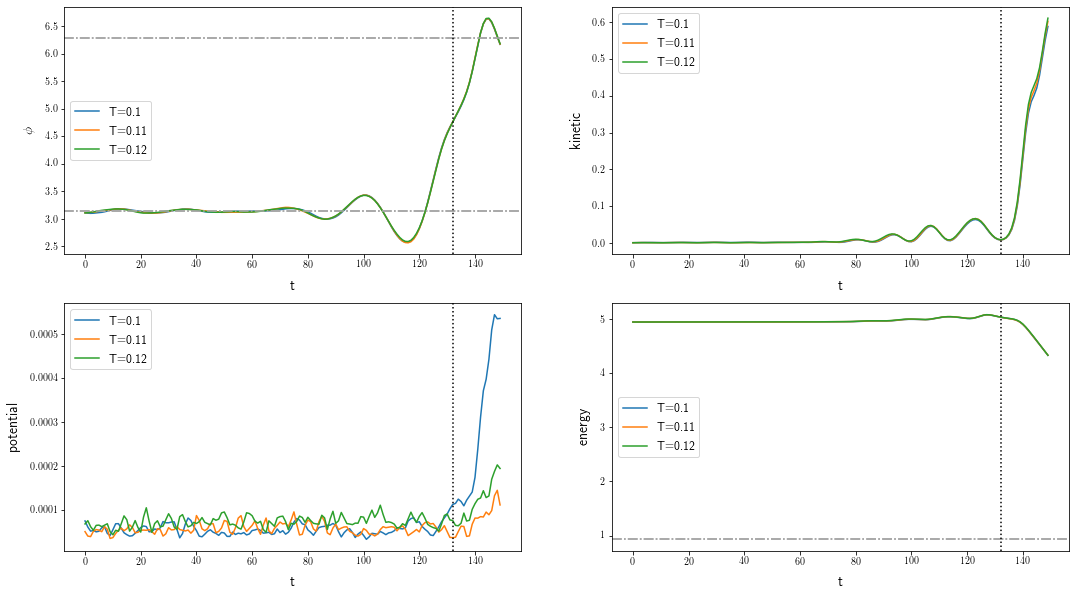

[0.1  0.11 0.12 0.08]
[132. 132. 132.]
[1.42567208 1.4252253  1.42616014]


In [10]:
fig, ax = plt.subplots(2, 2, figsize = (18, 10))

critSlices = []
indList = np.zeros(len(bubbleList))
encritList = np.zeros(len(bubbleList))

for ii, average_bubble in enumerate(bubbleList):
    temp = Tlist[ii]

    averagebub = average_bubble[0,:,:150, 100:-100]
    nT,nN = np.shape(averagebub[0])

    kinetic   = 0.5*averagebub[1]**2.
    gradient  = 0.5*averagebub[2]**2.
    potential = V(averagebub[0])
    totEbubble = kinetic + gradient + potential

    kinprof = np.trapz(kinetic, dx=dx, axis=1)
    gradprof = np.trapz(gradient, dx=dx, axis=1)
    enprof = np.trapz(totEbubble, dx=dx, axis=1)

    off = 120
    indmin = np.argmin(kinprof[off:]) + off
    indList[ii] = indmin

    slice = averagebub[0,indmin]
    xmax = np.argmax(slice)
    phiprof = averagebub[0,:,xmax+1]
    
    smslice = gaussian_filter(slice, 5, mode='nearest')
    bubbleCoords = smslice>phieq*1.03
    bubbleCoordsNot = smslice<=phieq*1.03

    momslice = averagebub[1,indmin]
    enslice  = totEbubble[indmin]
    ensliceBub = enslice*bubbleCoords
    ensliceBub = ensliceBub[np.argwhere(ensliceBub>0)].flatten()
    ensliceBubNot = enslice*bubbleCoordsNot
    ensliceBubNot = ensliceBubNot[np.argwhere(ensliceBubNot>0)].flatten()
    enslice = ensliceBub - np.mean(ensliceBubNot)
    encritList[ii] = np.trapz(ensliceBub, dx=dx)

    critSlices.append(np.asarray([slice, momslice, enslice]))

    ax[0,0].plot(phiprof, label='T='+str(temp))
    ax[0,0].axhline(phieq, ls='-.', color='darkgray')
    ax[0,0].axhline(2.*np.pi, ls='-.', color='darkgray')
    ax[0,1].plot(kinprof, label='T='+str(temp))
    ax[1,0].plot(gradprof, label='T='+str(temp))
    ax[1,1].plot(enprof, label='T='+str(temp))
    ax[1,1].axhline(Esph, ls='-.', color='darkgray')

for aa, axx in enumerate(ax.flatten()):
    axx.axvline(indmin, color='k', ls=':')
    axx.set_xlabel('t')
    axx.set_ylabel([r'$\phi$', 'kinetic', 'potential', 'energy'][aa])
    axx.legend()
plt.show()

print(Tlist)
print(indList)
print(encritList)

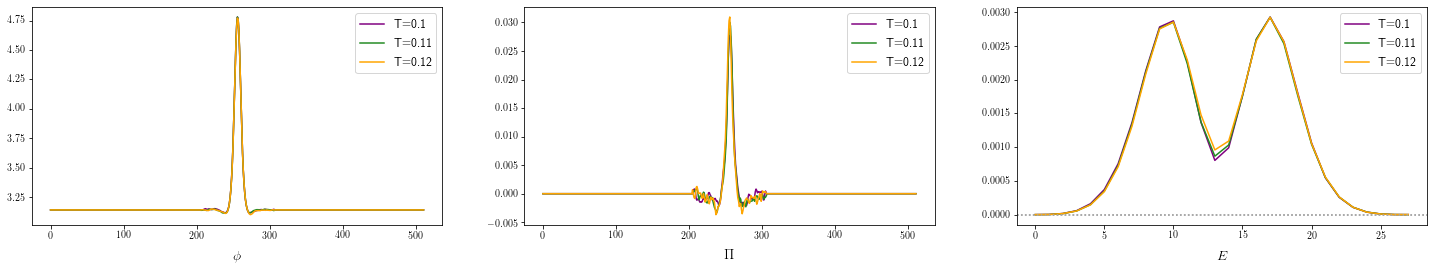

In [116]:
fig, ax = plt.subplots(1, 3, figsize = (25, 4))
cols = cycle(['purple', 'forestgreen', 'orange'])
for tmp, temp in enumerate(Tlist[:-1]):
    col = next(cols)
    
    slice, momslice, enslice = critSlices[tmp]

    slice = np.concatenate((slice, phieq*np.ones(nLat-len(slice))), axis=0)
    slice = np.roll(slice, nLat-int(-np.abs(nLat/2. - np.argmax(slice))))

    momslice = np.concatenate((momslice, np.zeros(nLat-len(momslice))), axis=0)
    momslice = np.roll(momslice, nLat-int(-np.abs(nLat/2. - np.argmax(momslice))))

    ax[0].plot(slice, label='T='+str(temp), ls='-', color=col)
    ax[1].plot(momslice, label='T='+str(temp), ls='-', color=col)
    ax[2].plot(enslice, label='T='+str(temp), ls='-', color=col)
    ax[2].axhline(0., ls=':', color='darkgray')

for aa, axx in enumerate(ax.flatten()):
    axx.set_xlabel('x')
    axx.set_xlabel([r'$\phi$', r'$\Pi$', r'$E$'][aa])
    axx.legend()
plt.show()

In [64]:
crit_soln_f90 = '(/'
for ind, iii in enumerate(slice):
    crit_soln_f90 = crit_soln_f90 + str(iii)
    if ind != len(slice)-1:
        crit_soln_f90 = crit_soln_f90 + ', '
crit_soln_f90 += '/)'
#print(crit_soln_f90)

In [34]:
crit_soln_f90 = '(/'
for ind, iii in enumerate(momslice):
    crit_soln_f90 = crit_soln_f90 + str(iii)
    if ind != len(momslice)-1:
        crit_soln_f90 = crit_soln_f90 + ', '
crit_soln_f90 += '/)'
#print(crit_soln_f90)

(3, 512, 512)


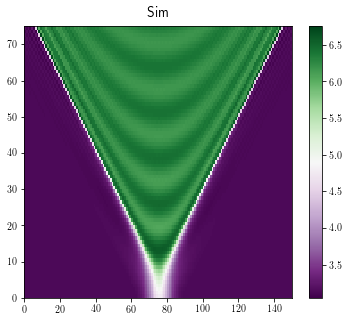

In [15]:
path_crit_sim = '/gpfs/dpirvu/velocity_comparison/crit_mom_and_bubble_x512_phi01.7952_lambda1.5000_T0.1000_sim0_fields.dat'
crit_real = extract_data(nLat, path_crit_sim)
win = 75
print(np.shape(crit_real))
crit_real = crit_real[:,:win,nLat//2-win:nLat//2+win]
nC, nT, nN = np.shape(crit_real)

# slice t=57 momentum is t=57
cmp = 'PRGn'#'viridis'#cmp='tab20b'
simple_imshow(crit_real[0], [0,nN,0,nT], cmp=cmp)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


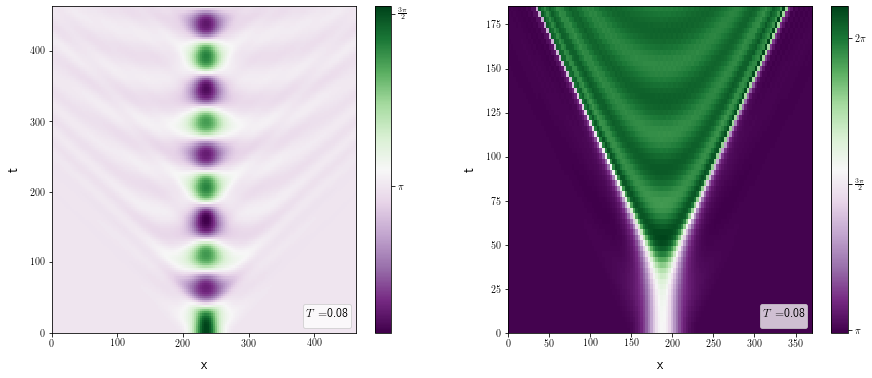

In [16]:
# slice t=57 momentum is 0
path_subcrit_sim = '/gpfs/dpirvu/velocity_comparison/crit_bubble_x512_phi01.7952_lambda1.5000_T0.1000_sim0_fields.dat'
subcrit_real = extract_data(nLat, path_subcrit_sim)

win = 75
subcrit_real = subcrit_real[0,:2*win,nLat//2-win:nLat//2+win]
nT, nN = np.shape(subcrit_real)
exts1 = [0*dx,nN*dx,0*dx,nT*dx]

# slice t=58 momentum is 0
path_crit_sim = '/gpfs/dpirvu/velocity_comparison/supercrit_bubble_x512_phi01.7952_lambda1.5000_T0.1000_sim0_fields.dat'
crit_real = extract_data(nLat, path_crit_sim)
win = 60
crit_real = crit_real[0,:win,nLat//2-win:nLat//2+win]
nT, nN = np.shape(crit_real)
exts2 = [0*dx,nN*dx,0*dx,nT*dx]

fig, ax = plt.subplots(1, 2, figsize = (15, 6))
cmp = 'PRGn'#'viridis'#cmp='tab20b'
im0 = ax[0].imshow(subcrit_real, aspect='auto', interpolation='none', extent=exts1, origin='lower', cmap=cmp)
clb0 = plt.colorbar(im0, ax = ax[0])
clb0.locator     = matplotlib.ticker.MultipleLocator(np.pi/2)
clb0.formatter   = matplotlib.ticker.FuncFormatter(multiple_formatter())
clb0.update_ticks()

im1 = ax[1].imshow(crit_real, aspect='auto', interpolation='none', extent=exts2, origin='lower', cmap=cmp)
clb1 = plt.colorbar(im1, ax = ax[1])
clb1.locator     = matplotlib.ticker.MultipleLocator(np.pi/2)
clb1.formatter   = matplotlib.ticker.FuncFormatter(multiple_formatter())
clb1.update_ticks()

plt.savefig('./data/critical_slice.pdf')
for aa in ax:
    aa.grid(False)
    aa.legend(title=r'$T=$'+str(temp), loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
ax[0].set_xlabel('x'); ax[0].set_ylabel('t')
ax[1].set_xlabel('x'); ax[1].set_ylabel('t')
plt.savefig('./data/critical_and_subcritical_bubble.pdf')
plt.show()

Number of bubbles, temperature: 1902 0.1
Number of bubbles, temperature: 2273 0.11
Number of bubbles, temperature: 2233 0.12


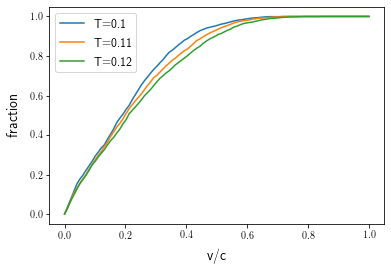

In [112]:
for tmp, temp in enumerate(Tlist[:-1]):
    ph0 = phi0List[tmp]

    all_vels = np.load(velocities_bubbles_file(nLat, lamb, ph0, temp)+'.npy')
    print('Number of bubbles, temperature:', len(all_vels), temp)
    all_vels = np.abs(all_vels)
 #   vlist = np.linspace(-1,1,100)
    vlist = np.linspace(0.,1,100)
    fraction = [len(all_vels[all_vels<ii])/len(all_vels) for ii in vlist]

    yerr = np.std(all_vels)
#    plt.fill_between(vlist, fraction - yerr, fraction + yerr, color='gray', alpha=0.2)
    plt.plot(vlist, fraction, label='T='+str(temp))
plt.xlabel('v/c'); plt.ylabel('fraction')
plt.legend(); plt.show()



0.2550537644109539
1902 1902
0.2767166672966293
2273 2273
0.29685770272614
2233 2233


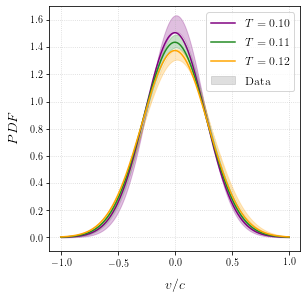

In [21]:
def gauss(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2./(2.*sigma**2.))

fig, ax = plt.subplots(1,1, figsize = (4.5,4.5))
cols = cycle(['purple', 'forestgreen', 'orange'])
#cols = cycle(['forestgreen', 'orange', 'blue'])
for tmp, temp in enumerate(Tlist[:-1]):
    col = next(cols)

    Eemp = encritList[tmp]
    ph0 = phi0List[tmp]
    
    xlist = np.linspace(-1.,1.,1000)
    all_vels = np.load(velocities_bubbles_file(nLat, lamb, ph0, temp)+'.npy')

    labs = r'$\phi_0=$'+str('%.2f'%ph0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    lsl = ('--' if tmp==0 else '-' if tmp==1 else ':' if tmp==2 else '-.')

    print(np.std(all_vels))

    mu    = 0.
    sigma = (temp/Eemp)**0.5

    nB = 20
    slots = np.linspace(-1., 1., nB)
    ax.plot(xlist, scp.stats.norm.pdf(xlist, mu, sigma), label=r'$T=%5.2f$'%(temp), ls='-', color=col)

    pool = set(all_vels); print(len(pool), len(all_vels))
    nsets = 7
    setList = []
    means, vars = np.empty(nsets), np.empty(nsets)
    slen = len(pool) // nsets # we need 3 subsets
    for ss in range(nsets):
        setList.append(random.sample(pool, slen))
        means[ss], vars[ss] = np.mean(setList[-1]), np.std(setList[-1])
        pool -= set(setList[-1])

    ax.fill_between(xlist, scp.stats.norm.pdf(xlist, np.mean(means), np.mean(vars)-np.std(vars)),\
                           scp.stats.norm.pdf(xlist, np.mean(means), np.mean(vars)+np.std(vars)), color=col, alpha=0.25)
ax.fill_between(xlist, 1000, 1000, ls='-', color='gray', alpha=0.25, label=r'$\rm Data$')
ax.legend()
ax.grid(ls=':', color='darkgray',alpha=0.5)
ax.set_ylim((-0.1, 1.7))
ax.set_xlabel(r'$v/c$')
ax.set_ylabel(r'$PDF$')
plt.savefig('./data/thermal_vels_PDF.pdf'); plt.show()


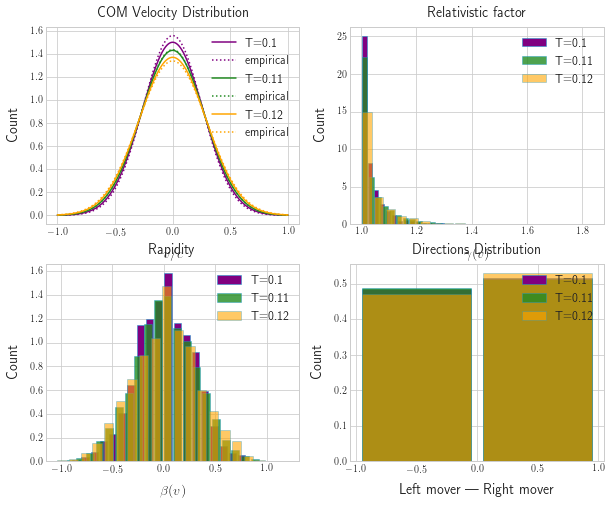

In [133]:
fig, ax = plt.subplots(2,2, figsize = (10,8))
plt.style.use('seaborn-whitegrid') # nice and clean grid
cols = cycle(['purple', 'forestgreen', 'orange'])
for tmp, temp in enumerate(Tlist[:-1]):
    col = next(cols)
    ph0 = phi0List[tmp]
    Eemp = encritList[tmp]

    all_vels = np.load(velocities_bubbles_file(nLat, lamb, ph0, temp)+'.npy')
    xlist     = np.linspace(-1.,1.,1000)
    
    mu        = 0.
    sigma     = (temp/Eemp)**0.5

    nB = 20
    slots = np.linspace(-1., 1., nB)

#    ax[0,0].hist(all_vels, bins=slots, density=True, rwidth=0.8,  edgecolor='#169acf', linewidth=0.5, label='T='+str(temp))
    ax[0,0].plot(xlist, scp.stats.norm.pdf(xlist, mu, sigma), label='T='+str(temp), ls='-', color=col)
    ax[0,0].plot(xlist, scp.stats.norm.pdf(xlist, 0, np.std(all_vels)), label='empirical', ls=':', color=col)
 #   ax[0,0].plot(xlist, scp.stats.norm.pdf(xlist, np.mean(all_vels), np.std(all_vels)), label='empirical', ls=':', color=col)
    ax[0,0].set_title('COM Velocity Distribution')
    ax[0,0].set_xlabel(r'$v/c$')

    ax[0,1].hist(gamma(all_vels), bins=nB, density=True, rwidth=0.8,  edgecolor='#169acf', linewidth=0.5, alpha=1-tmp*0.2, color=col, label='T='+str(temp))
    ax[0,1].set_title('Relativistic factor')
    ax[0,1].set_xlabel(r'$\gamma(v)$')

    ax[1,0].hist(rapidity(all_vels), bins=nB, density=True, rwidth=0.8,  edgecolor='#169acf', linewidth=0.5, alpha=1-tmp*0.2, color=col, label='T='+str(temp))
    ax[1,0].set_title('Rapidity')
    ax[1,0].set_xlabel(r'$\beta(v)$')

    ax[1,1].hist(np.sign(all_vels), bins=2, density=True, rwidth=0.9,  edgecolor='#169acf', linewidth=0.5, alpha=1-tmp*0.2, color=col, label='T='+str(temp))
    ax[1,1].set_title('Directions Distribution')
    ax[1,1].set_xlabel(r' Left mover | Right mover ')

    for axx in ax.flatten():
        axx.set_ylabel('Count')
        axx.legend()
plt.savefig('./data/histograms_vels_temp.pdf')
plt.show()


7 [114 120 126 132 138 144 150]
466.3124284037356
7 [114 120 126 132 138 144 150]
466.3124284037356
7 [114 120 126 132 138 144 150]
466.3124284037356
7 [114 120 126 132 138 144 150]
466.3124284037356
7 [114 120 126 132 138 144 150]
466.3124284037356
7 [114 120 126 132 138 144 150]
466.3124284037356


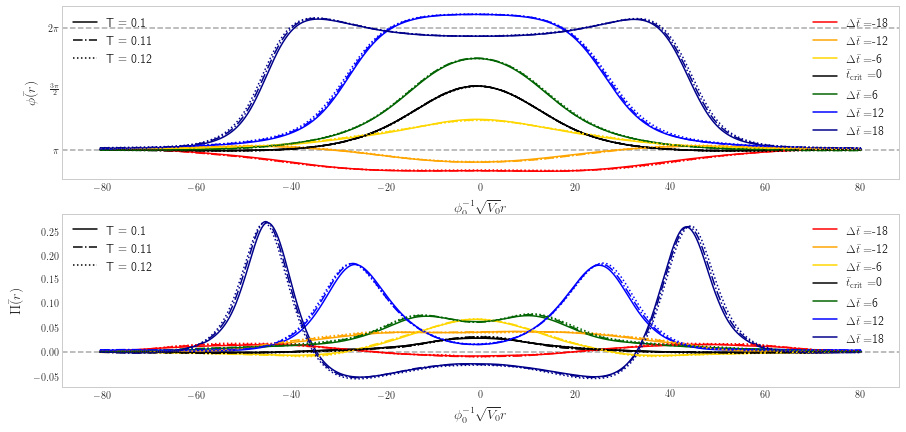

In [139]:
# Compare profiles

fig, ax = plt.subplots(2, 1, figsize = (15, 7))
ax[1].axhline(0., color='darkgray', ls='--')
ax[0].axhline(phieq, color='darkgray', ls='--')
ax[0].axhline(2.*np.pi, color='darkgray', ls='--') 
ax[0].yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

for coln in [0,1]:
    bool = True
    lss = cycle(['-', '-.', ':'])
    secondary_lines, secondary_labels = [], []
    for b, bub in enumerate(bubbleList):
        indmin = int(indList[b])
        timesList = np.arange(indmin-18, indmin+24, 6)
        print(len(timesList), timesList)

        temp = Tlist[b]
        
        #xcen = 0
        xcen = (np.argmax(bub[0,0,indmin,:])+1)*dx; print(xcen)

        cols = cycle(['red', 'orange', 'gold', 'darkgreen', 'blue', 'darkblue', 'purple', 'violet'])
        ls = next(lss)
        for tt in timesList:
            xmin   = 125
            data   = bub[0,coln,tt,xmin:-xmin+1]
            xlist  = np.linspace(xmin, len(data)+xmin, len(data))*dx
            xlist  = xlist - xcen

            spline  = scp.interpolate.splrep(xlist, data)
            r       = np.linspace(xlist[0], xlist[-1], 2000)
            profile = scp.interpolate.splev(r, spline)

            if tt == indmin:
                col = 'k'
                secondary_labels.append('T = '+str(temp))
                l1, = ax[coln].plot(r, profile, color=col, ls=ls)
                secondary_lines.append(l1)
            else:
                col = next(cols)
            if bool:
                ax[coln].plot(r, profile, color=col, ls=ls, label=(r'$\Delta \bar{t} = $'+str(tt-indmin) if tt!=indmin else r'$\bar{t}_{\rm crit} = $'+str(tt-indmin)))
            else:
                ax[coln].plot(r, profile, color=col, ls=ls)

        bool = False
    ax[coln].add_artist(ax[coln].legend(secondary_lines, secondary_labels, loc=2))
    
ax[0].set_ylabel(r'$\bar{\phi(r)}$')
ax[1].set_ylabel(r'$\bar{\Pi(r)}$')
for axx in ax.flatten():
    axx.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} r$')
    axx.legend()
    axx.grid(False)
plt.savefig('./data/profile_comparison_thermal.pdf')
plt.show()


In [4]:
import matplotlib.pyplot as plt

plt.rcParams.update({'backend' : 'Qt5Agg'})
plt.rcParams.update({'text.usetex' : True})

plt.rcParams.update({'font.size' : 12.0})
plt.rcParams.update({'axes.titlesize' : 14.0})  # Font size of title
plt.rcParams.update({'axes.titlepad'  : 10.0})
plt.rcParams.update({'axes.labelsize' : 14.0})  # Axes label sizes
plt.rcParams.update({'axes.labelpad'  : 10.0})
plt.rcParams.update({'xtick.labelsize'  : 14.0})
plt.rcParams.update({'ytick.labelsize'  : 14.0})
plt.rcParams.update({'xtick.labelsize'  : 10.0})
plt.rcParams.update({'ytick.labelsize'  : 10.0})

plt.rcParams.update({'axes.spines.left'  : True})
plt.rcParams.update({'axes.spines.right'  : True})
plt.rcParams.update({'axes.spines.top'  : True})
plt.rcParams.update({'axes.spines.bottom'  : True})
plt.rcParams.update({'savefig.format'     : 'pdf'})
plt.rcParams.update({'savefig.bbox'       : 'tight'})
plt.rcParams.update({'savefig.pad_inches' : 0.1})
plt.rcParams.update({'pdf.compression' : 6})
#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226'])

def ax_opts(ax):
    ax[0].axhline(phieq, color='darkgray', ls='--')
    ax[0].axhline(2.*np.pi, color='darkgray', ls='--') 
    ax[1].axvline(phieq, color='darkgray', ls='--')
    ax[1].axvline(2.*np.pi, color='darkgray', ls='--') 
    ax[0].yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax[0].yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    ax[1].xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax[1].xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    ax[0].set_xlabel(r'$r$')
    ax[0].set_ylabel(r'$\phi$')
    ax[1].set_ylabel(r'$r$')
    ax[1].set_xlabel(r'$\phi$')
    for axx in ax:
        axx.legend()
        axx.grid()
    return ax

# Bounce Reconstruction

500
500
500


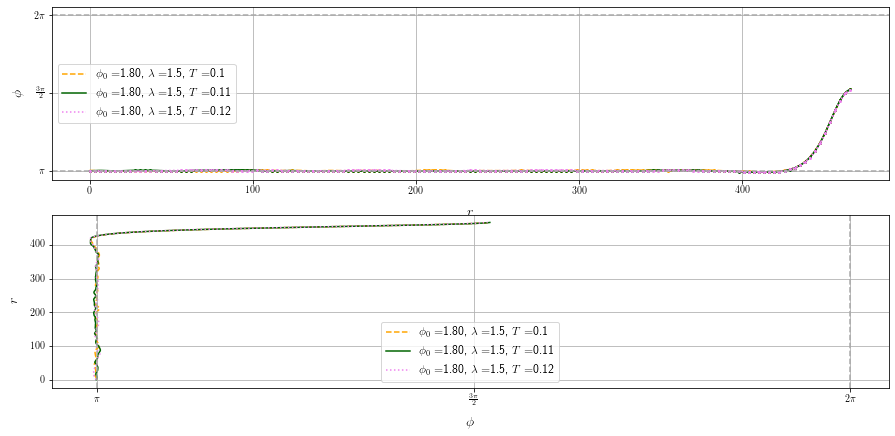

In [5]:
fig, ax = plt.subplots(2, 1, figsize = (15, 7))
cols = cycle(['orange', 'darkgreen', 'violet', 'orangered'])

fvrecoList = []
for ii, average_bubble in enumerate(bubbleList):
    tmp    = ii
    indmin = 132 # int(indList[ii])
    temp   = Tlist[tmp]
    ph0    = phi0List[tmp]
    col    = next(cols)

    data   = average_bubble[0,0,indmin]
    xpeak  = np.argmax(data)
    xstart = 0

    data   = data[xstart:xpeak+1]
    xlist  = np.linspace(xstart, len(data), len(data))*dx

    spline     = scp.interpolate.splrep(xlist, data)    # interpolate mean field
    der1spline = scp.interpolate.splder(spline, n=1)    # take tangent to this curve
    der2spline = scp.interpolate.splder(spline, n=2)    # take tangent to tangent curve

    rr       = np.linspace(xlist[0], xlist[-1], 500)
    phifv    = scp.interpolate.splev(rr, spline)
    dphidr   = scp.interpolate.splev(rr, der1spline)
    ddphiddr = scp.interpolate.splev(rr, der2spline); print(len(ddphiddr))

    # integrate product of derivatives above to get potential function of r
    dVdr = scp.interpolate.splrep(rr, - (dphidr*ddphiddr) )
    Vantider = scp.interpolate.splantider(dVdr, n=1)
    Vofrofphi = scp.interpolate.splev(rr, Vantider)

    fvrecoList.append(np.asarray([tmp, temp, lamb, ph0, rr, phifv, dphidr, ddphiddr, Vofrofphi]))

    labs = r'$\phi_0=$'+str('%.2f'%ph0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    lsl = ('-' if tmp==1 else '--' if tmp==0 else ':' if tmp==2 else '-.')

    ax[0].plot(xlist, data, color=col, ls=lsl, marker='o', ms=2)
    ax[0].plot(rr, phifv, color=col, ls=lsl, label=labs)
    ax[1].plot(phifv, rr, color=col, ls=lsl, label=labs)

ax = ax_opts(ax)
plt.show()


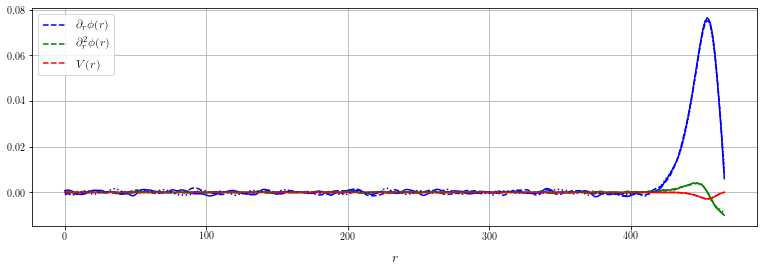

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (13, 4))
for ii, lists in enumerate(fvrecoList):
    tmp, temp, lamb, ph0, rr, phifv, dphidr, ddphiddr, Vofrofphi = lists

    lsl = ('-' if tmp==1 else '--' if tmp==0 else ':' if tmp==2 else '-.')
    ax.plot(rr, dphidr, 'b', ls=lsl, label=(f'$\partial_r \phi(r)$' if ii==0 else None))
    ax.plot(rr, ddphiddr, 'g', ls=lsl, label=(f'$\partial_r^2 \phi(r)$' if ii==0 else None))
    ax.plot(rr, Vofrofphi, 'r', ls=lsl, label=(f'$V(r)$' if ii==0 else None))

ax.set_xlabel(r'$r$'); ax.legend(); ax.grid(); plt.show()

# The Roll 

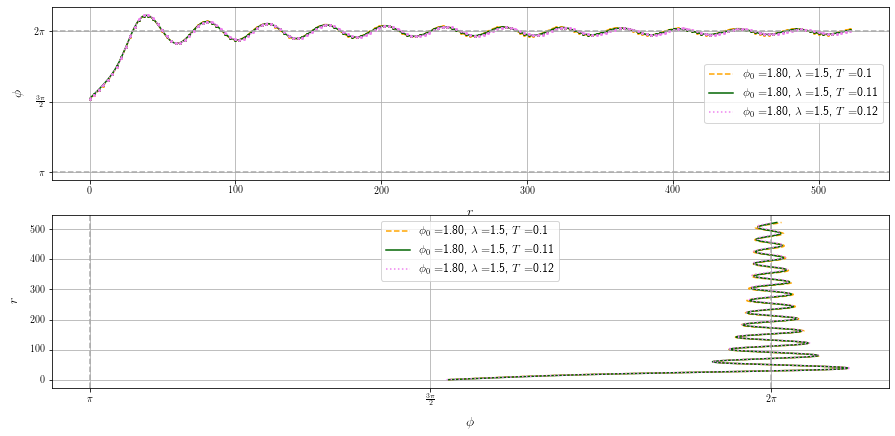

In [111]:
cols = cycle(['orange', 'darkgreen', 'violet', 'orangered'])
fig, ax = plt.subplots(2, 1, figsize = (15, 7))

rollrecoList = []
for ii, average_bubble in enumerate(bubbleList):
    tmp = ii
    temp = Tlist[tmp]
    ph0 = phi0List[tmp]
    indmin = 132#int(indList[ii])

    col = next(cols)

    off = 0
    xpeak = np.argmax(average_bubble[0,0,indmin+off])
    tstop = len(average_bubble[0,0])
 #   tstop = np.argmax(average_bubble[0,0,:,xpeak])

    data  = average_bubble[0,0][indmin+off: tstop+1, xpeak]
    tlist = np.linspace(off, off+len(data), len(data))*dx

    spline     = scp.interpolate.splrep(tlist, data)    # interpolate mean field
    der1spline = scp.interpolate.splder(spline, n=1)    # take tangent to this curve
    der2spline = scp.interpolate.splder(spline, n=2)    # take tangent to tangent curve

    rt       = np.linspace(tlist[0], tlist[-1], 1000)
    phiroll  = scp.interpolate.splev(rt, spline)[int(off*(1000/len(tlist)))+1:]
    dphidr   = scp.interpolate.splev(rt, der1spline)[int(off*(1000/len(tlist)))+1:]
    ddphiddr = scp.interpolate.splev(rt, der2spline)[int(off*(1000/len(tlist)))+1:]
    rt = rt[int(off*(1000/len(tlist)))+1:]

    # integrate product of derivatives above to get potential function of r
    wild = 1.
    
    dVdr = scp.interpolate.splrep(rt, (dphidr*ddphiddr + dphidr**2./rt*wild) )
    Vantider = scp.interpolate.splantider(dVdr, n=1)
    Vofrofphi = scp.interpolate.splev(rt, Vantider)# + V(average_bubble[0,0][indmin+off,xpeak])
   # Vofrofphi -= Vfit(phiroll[0]) - Vfit(np.pi)
    Vofrofphi -= Vfit(data[0]) - Vfit(np.pi)#; print(Vfit(data[0]), Vfit(np.pi))

    rollrecoList.append(np.asarray([tmp, temp, lamb, ph0, rt, phiroll, dphidr, ddphiddr, Vofrofphi]))

    labs = r'$\phi_0=$'+str('%.2f'%ph0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    lsl = ('-' if tmp==1 else '--' if tmp==0 else ':' if tmp==2 else '-.')

    ax[0].plot(tlist, data , color=col, ls='None', marker='o', ms=2)
    ax[0].plot(rt, phiroll, color=col, ls=lsl, label=labs)
    ax[1].plot(phiroll, rt , color=col, ls=lsl, label=labs)

ax = ax_opts(ax)
plt.show()

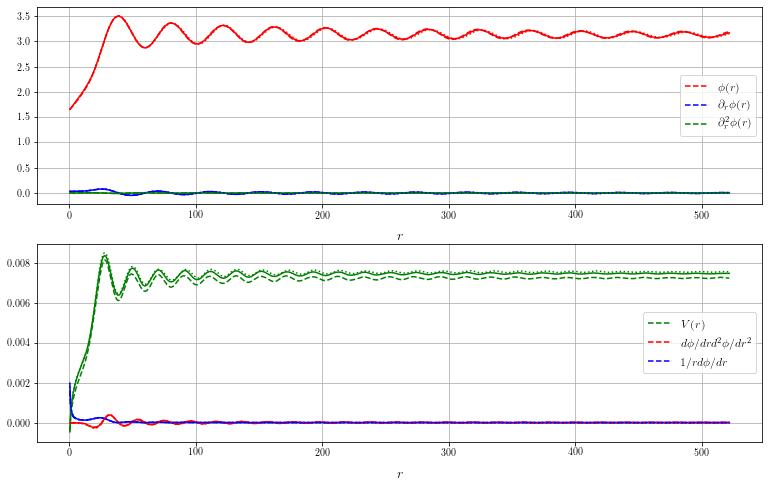

In [112]:
fig, ax = plt.subplots(2, 1, figsize = (13, 8))
for ii, lists in enumerate(rollrecoList):
    tmp, temp, lamb, ph0, ts, phiroll, dphidr, ddphiddr, Vofrofphi = lists

    lsl = ('-' if tmp==1 else '--' if tmp==0 else ':' if tmp==2 else '-.')

    ax[0].plot(ts, phiroll-phieq   , 'r', ls=lsl, label=(f'$\phi(r)$' if ii==0 else None))
    ax[0].plot(ts, dphidr          , 'b', ls=lsl, label=(f'$\partial_r \phi(r)$' if ii==0 else None))
    ax[0].plot(ts, ddphiddr        , 'g', ls=lsl, label=(f'$\partial_r^2 \phi(r)$' if ii==0 else None))
    ax[1].plot(ts, Vofrofphi       , 'g', ls=lsl, label=(f'$V(r)$' if ii==0 else None))
    ax[1].plot(ts, -dphidr*ddphiddr, 'r', ls=lsl, label=(f'$d\phi/drd^2\phi/dr^2$' if ii==0 else None))
    ax[1].plot(ts, dphidr**2./ts   , 'b', ls=lsl, label=(f'$1/r d\phi/dr$' if ii==0 else None))

for axx in ax: axx.set_xlabel(r'$r$'); axx.legend(); axx.grid()
plt.show()

# Full reconstruction

lambda = 1.5 0.01 , fit params: 1.4538871421223283 0.009977170032336504 -0.9993071533045094 , $m2(\lambda) = $ 0.011115697382149377
lambda = 1.5 0.01 , fit params: 1.4526363685377957 0.010302806846167542 -0.9993329955594661 , $m2(\lambda) = $ 0.011441032279923546
lambda = 1.5 0.01 , fit params: 1.4418979593311738 0.010583724705543609 -0.9993682126419664 , $m2(\lambda) = $ 0.011423957046368394


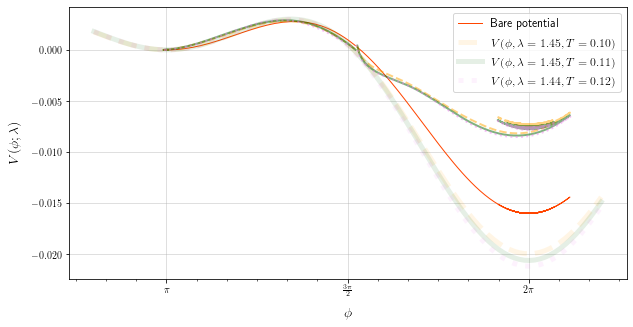

In [128]:
def fit_to_V(x, lam, V0, a):
    return (-np.cos(x) + 0.5*lam**2. * np.sin(x)**2. + a) * V0

fig, ax = plt.subplots(1, 1, figsize = (10, 5))

cols = cycle(['orange', 'darkgreen', 'violet', 'orangered'])
extphi = np.linspace(phieq*0.8, 2.*np.pi*1.1, 100)
for ii in range(len(rollrecoList)):
    col = next(cols)
    
    tmp, temp, lamb, ph0, ts, phiroll, dphidr, ddphiddr, Vrollofrofphi = rollrecoList[ii]
    tmp, temp, lamb, ph0, r, phifv, dphidr, ddphiddr, Vfvofrofphi = fvrecoList[ii]
    
    xlist = np.concatenate((phifv, phiroll))
    curve = -np.concatenate((Vfvofrofphi, Vrollofrofphi))
    xlist = phifv
    curve = -Vfvofrofphi
    
    lsl = ('-' if tmp==1 else '--' if tmp==0 else ':')

    if ii==0:
        plt.plot(phifv, (Vfit(phifv)-Vfit(phieq)), ls='-', linewidth=1, color='orangered', label='Bare potential')
        plt.plot(phiroll, (Vfit(phiroll)-Vfit(phieq)), ls='-', linewidth=1, color='orangered')

    plt.plot(phifv, -Vfvofrofphi, color=col, ls=lsl, alpha=0.5, linewidth=2)
    plt.plot(phiroll, -Vrollofrofphi, color=col, ls=lsl, alpha=0.5, linewidth=2)

    popt, _ = scp.optimize.curve_fit(fit_to_V, xlist, curve)
    plt.plot(extphi, fit_to_V(extphi, *popt), color=col, ls=lsl, label=f'$V(\phi, \lambda=%5.2f, T=%5.2f)$'%(popt[0], temp), linewidth=5, alpha=0.1)

    spline    = scp.interpolate.splrep(extphi, fit_to_V(extphi, *popt))
    seconder  = scp.interpolate.splev(phieq, scp.interpolate.splder(spline, n=2))
    print('lambda =', lamb, m2eff, ', fit params:', *popt, r', $m2(\lambda) = $', seconder)

plt.legend()
plt.grid(alpha=0.5)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$V(\phi;\lambda)$')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.savefig('./data/reconstructed_potential.pdf', rasterize=True)
plt.show()

In [42]:
get_decayrate = False
if get_decayrate:
    for tmp, temp in enumerate(Tlist[[0,3,1]]):
        ph0      = phi0List[tmp]
        sigmafld = fluct_stdev(m2eff, ph0, temp)
        ampList  = np.linspace(phieq + 2.8*sigmafld, phieq + 5.5*sigmafld, 20)
        print('Temperature, phi0:', temp, ph0, sigmafld)

        win         = 150
        plots       = False
        critSize    = 30
        threshSize  = ampList[-1]
        print('Average bubble params:', win, critSize, threshSize)

        good_decays_path1 = sims_that_decay_fine_file(nLat, lamb, ph0, temp, 0   , 2000, nTimeMAX)
        good_decays_path2 = sims_that_decay_fine_file(nLat, lamb, ph0, temp, 2000, 4000, nTimeMAX)
        good_decays_path3 = sims_that_decay_fine_file(nLat, lamb, ph0, temp, 4000, 6000, nTimeMAX)

        emptdecaylist = []
        for good_path in [good_decays_path1, good_decays_path2, good_decays_path3]:
            if os.path.exists(good_path+'.npy'):
                good_decays  = np.asarray(np.load(good_path+'.npy'))
                print(good_decays)
                for sim, outcome in good_decays:
                    path_sim = clean_sim_location(nLat, lamb, ph0, temp, sim)
                    if os.path.exists(path_sim+'.npy'):
                        real, sim, tdecay = np.asarray(np.load(path_sim + '.npy'))
                        emptdecaylist.append(np.asarray([sim, tdecay]))
        emptdecaylist = np.asarray(emptdecaylist)
        print(np.shape(emptdecaylist))

        emptdecaylist = emptdecaylist[np.argsort(emptdecaylist[:,1])]

        trip = len(emptdecaylist)//3
        print(emptdecaylist[trip,1], emptdecaylist[2*trip,1], emptdecaylist[-1,1])

        all_data0, all_data1, all_data2 = [], [], []
        for sind, sim in enumerate(emptdecaylist[:,0]):

            loc_rest_bub = bubble_at_rest(nLat, lamb, ph0, temp, sim)+'.npy'
            if os.path.exists(loc_rest_bub):
                sim, real, totalvCOM, finalv = np.load(loc_rest_bub)
                if sind < trip:
                    all_data0.append(np.asarray([real, totalvCOM, sim]))
                elif sind >= trip and sind < 2*trip:
                    all_data1.append(np.asarray([real, totalvCOM, sim]))
                elif sind >= 2*trip:
                    all_data2.append(np.asarray([real, totalvCOM, sim]))
        all_data0 = np.asarray(all_data0)
        all_data1 = np.asarray(all_data1)
        all_data2 = np.asarray(all_data2)

        print('Total bubbles included:', len(all_data0), len(all_data1), len(all_data2))

        for dint, data in enumerate([all_data0, all_data1, all_data2]):
            typex = 2 # this is a must
            stacks  = stack_bubbles(data, plots, win, phieq, threshSize, critSize, typex)
            stacks  = average_stacks(stacks, plots, normal)
            avstack = average_bubble_stacks(stacks)
            np.save(average_bubble_file(nLat, lamb, ph0, temp)+'_staggered'+str(dint), avstack)
            print('Average bubble saved.', dint)



In [29]:
testbubbleList = []
for tmp, temp in enumerate(Tlist[[3]]):
    ph0      = phi0List[tmp]
    print('Temperature, phi0:', temp, ph0)

    for dint in range(3):
        testbubbleList.append(np.load(average_bubble_file(nLat, lamb, ph0, temp)+'_staggered'+str(dint)+'.npy'))


Temperature, phi0: 0.11 1.7951958020513104


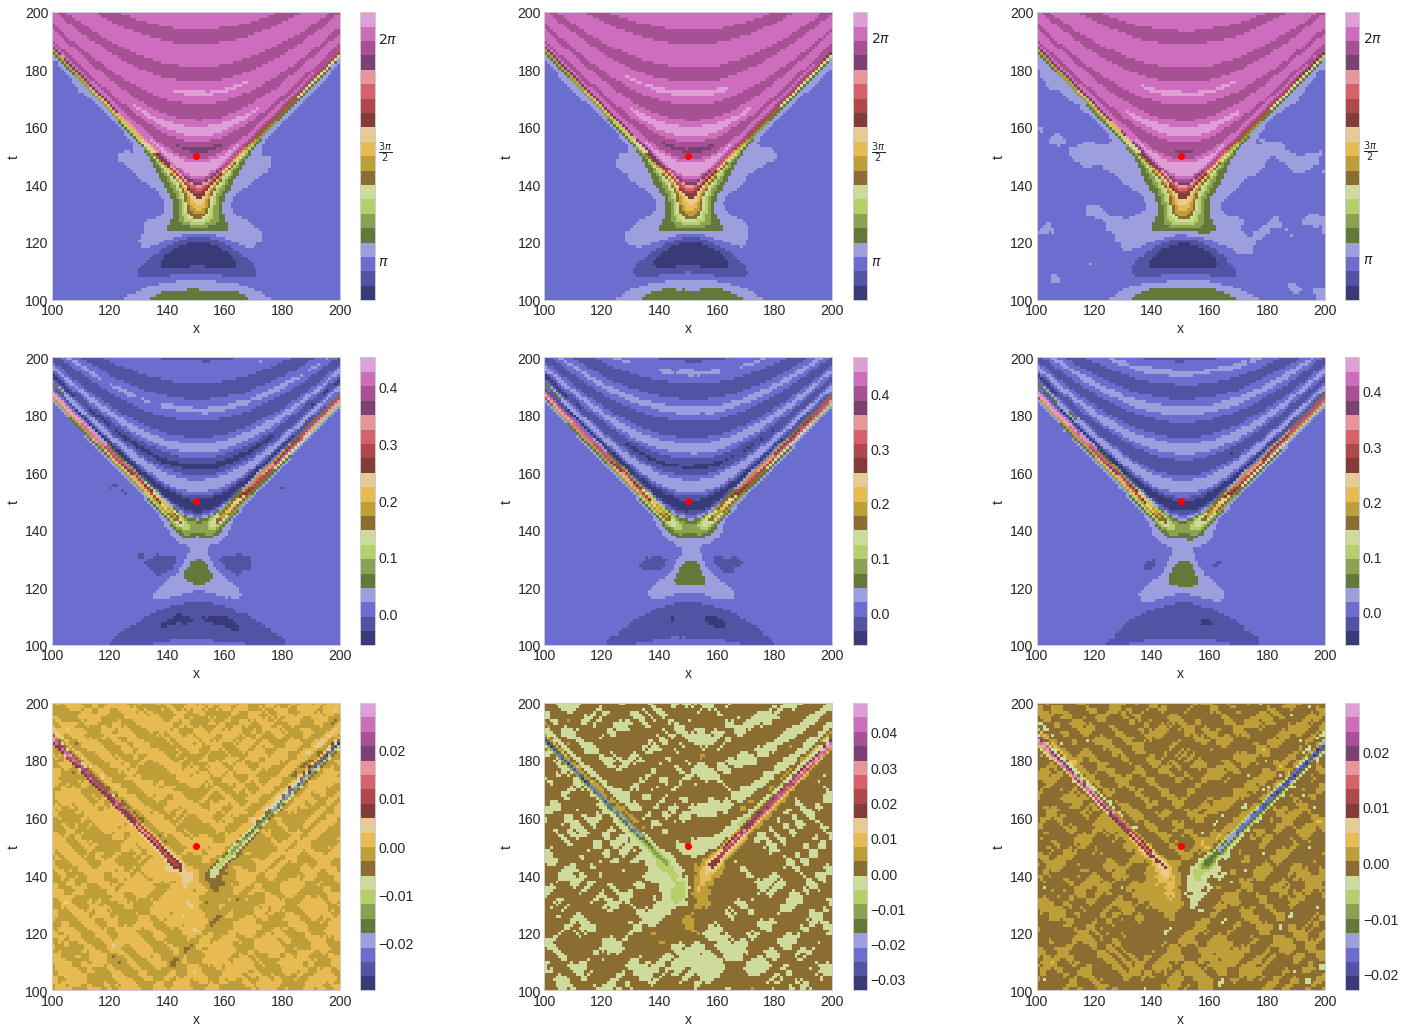

In [30]:
win = 50
tp = 0 # 0 for average, 1 for error
fig, ax = plt.subplots(3, len(testbubbleList), figsize = (25, 18))
for ii, average_bubble in enumerate(testbubbleList):

    nT, nN  = np.shape(average_bubble[0,0])
    tcen, xcen  = find_nucleation_center2(average_bubble[0,0], phieq, threshSize, critSize)
    tl, tr        = max(0, tcen-win), min(nT-1, tcen+win)
    xl, xr        = max(0, xcen-win), min(nN-1, xcen+win)

    ext = [xl,xr,tl,tr]
    bubble2plot = average_bubble[tp,0][tl:tr,xl:xr]
    im0 = ax[0,ii].imshow(bubble2plot, interpolation='none', extent=ext, origin='lower', cmap='tab20b')
    clb0 = plt.colorbar(im0, ax = ax[0,ii])
    clb0.locator     = matplotlib.ticker.MultipleLocator(np.pi/2)
    clb0.formatter   = matplotlib.ticker.FuncFormatter(multiple_formatter())
    clb0.update_ticks()

    bubble2plot = average_bubble[tp,1][tl:tr,xl:xr]
    im1 = ax[1,ii].imshow(bubble2plot, interpolation='none', extent=ext, origin='lower', cmap='tab20b')
    clb1 = plt.colorbar(im1, ax = ax[1,ii])

    bubble2plot = average_bubble[tp,2][tl:tr,xl:xr]
    im2 = ax[2,ii].imshow(bubble2plot, interpolation='none', extent=ext, origin='lower', cmap='tab20b')
    clb2 = plt.colorbar(im2, ax = ax[2,ii])

    for aa, axx in enumerate(ax[:,ii]):
        axx.plot(xcen,tcen,'ro')
        axx.set_xlabel('x')
        axx.set_ylabel('t')
        axx.grid(False)
#plt.savefig('./data/average_bubbles_comparison.pdf', format='pdf', dpi=5000, rasterize='True')
plt.show()
